# APS 7 - Teste AB

Integrantes (trocar para nomes reais):

**Vitória**

**Beatriz Mie**

**Beatriz Alexandre**

**Manuela**

Deadline: **24/10**

Fazer junto com o grupo que levantou as amostras de *co-design*

### Teste AB via permutação

Agora que você sabe como fazer testes de permutação, realize um teste de diferença de médias entre as versões $A$ e $B$ 

**1.**  Descreva o que era diferente nas versões $A$ e $B$ do seu projeto. Incluir screenshots

Dica: o Jupyter Notebook deixa realizar *paste* de imagens

A:  a fonte do menu superior(header) é menor
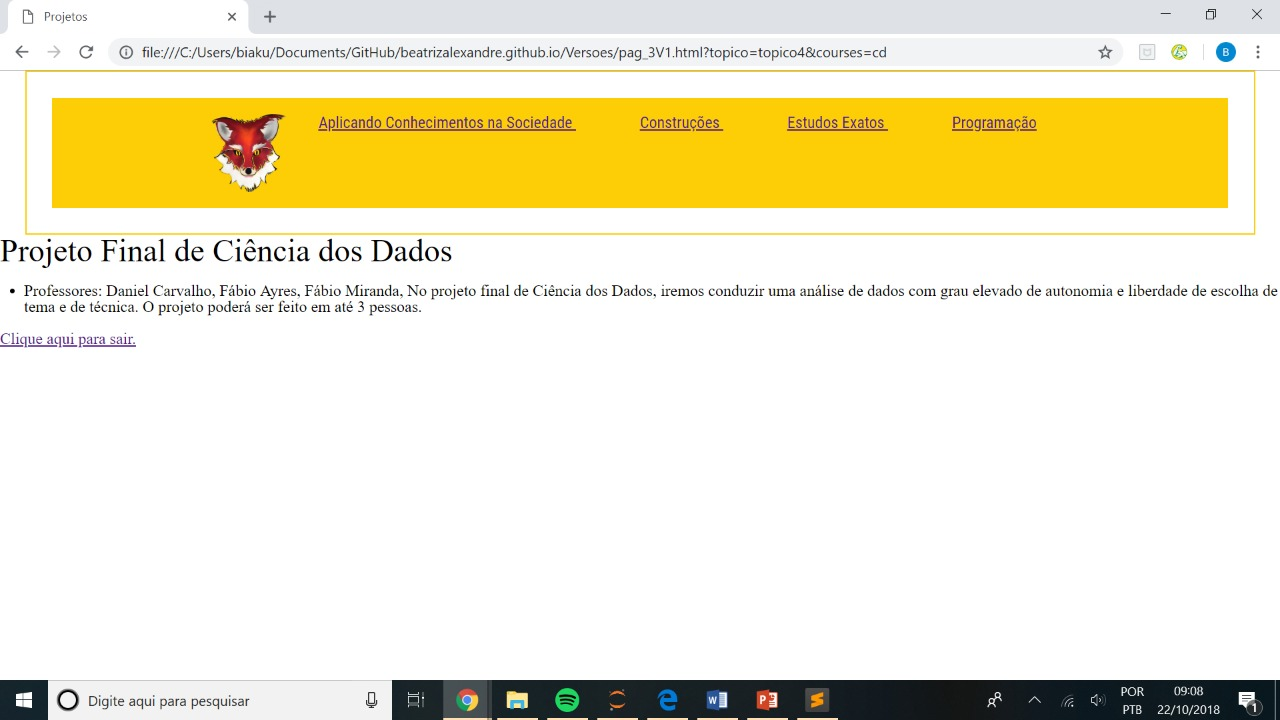

B: a fonte do menu superior(header) é maior
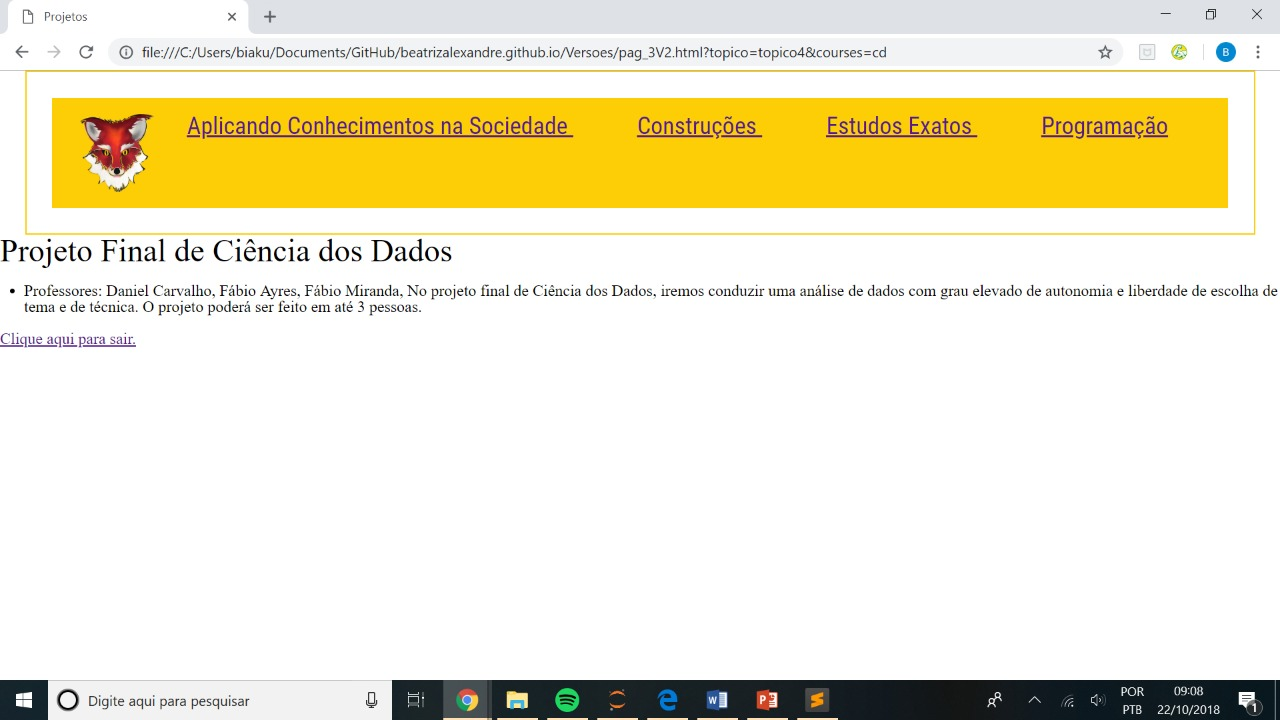

**2.** Leia o arquivo *JSON* e o converta em *DataFrame*. Veja os exemplos na pasta [TesteAB](./TesteAB).

In [20]:
%matplotlib inline
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math
import random
from scipy.stats import percentileofscore # função reversa do np.percentile

In [21]:
arquivo = open("teste-a-e-b-export.json")
linhas = arquivo.readlines()
texto = "".join(linhas)
dados_fire = json.loads(texto)

In [22]:
for k, v in dados_fire.items():
    
    for chave, valor in v.items():
        #FALTA ISSO TAMBEM
        pass #ISSO TAMBEM


In [23]:
contadorv1 = []
contadorv2 = []
for k, v in dados_fire.items():
    if v["filename"] == "pag_3V2.html?topico=topico4&courses=codesign":
        contadorv2.append(v['filename']) 
    elif v["filename"] == "pag_3V1.html?topico=topico4&courses=codesign":
        contadorv1.append(v['filename'])

if len(contadorv1)>len(contadorv2):
    print("houve mais entrada na página 1")
elif len(contadorv1)<len(contadorv2):
    print("houve mais entrada na página 2")
else:
    print("número de entrada foram iguais")



houve mais entrada na página 2


## convertendo para um dataframe

In [24]:
lista_dicionarios = []

for k, v in dados_fire.items():
    lista_dicionarios.append(v)
    
lista_dicionarios[:3]

[{'elapsed': 2903,
  'filename': 'pag_3V2.html?topico=topico4&courses=codesign',
  'id': 'a33f8abc585104620d801afb4f46ffd7'},
 {'elapsed': 4954,
  'filename': 'pag_3V2.html?topico=topico4&courses=codesign',
  'id': 'bc6e2417b9feaf78556efcd68d30505e'},
 {'elapsed': 32529,
  'filename': 'pag_3V1.html?topico=topico4&courses=codesign',
  'id': '87cf0937b90f39062ae267a75c3fa6e3'}]

In [25]:
dataframe = pd.DataFrame.from_records(lista_dicionarios)
dataframe.head(1)

,elapsed,filename,id
0,2903,pag_3V2.html?topico=topico4&courses=codesign,a33f8abc585104620d801afb4f46ffd7


In [26]:
dataframeLIMPO = dataframe[(dataframe.filename == "pag_3V2.html?topico=topico3&courses=matvar") | (dataframe.filename == "pag_3V1.html?topico=topico3&courses=matvar")]


In [27]:
dataframeLIMPO.sort_values(by = ['id', 'filename', 'elapsed']).head(3)

,elapsed,filename,id
47,5215,pag_3V2.html?topico=topico3&courses=matvar,0127ba96af6312efec3e3ccea72164b3
48,6129,pag_3V2.html?topico=topico3&courses=matvar,0127ba96af6312efec3e3ccea72164b3
44,2357,pag_3V2.html?topico=topico3&courses=matvar,12531be8a2c2aa122ecb429f1065786e


## comparação dos histogramas

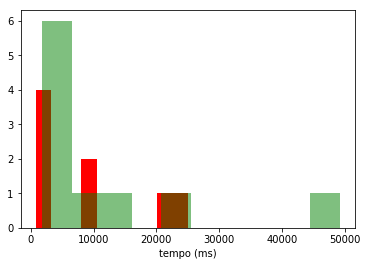

In [28]:
tempoA = list(dataframeLIMPO[dataframeLIMPO.filename =="pag_3V1.html?topico=topico3&courses=matvar"].elapsed)
tempoB = list(dataframeLIMPO[dataframeLIMPO.filename =="pag_3V2.html?topico=topico3&courses=matvar"].elapsed)
plt.hist(tempoA, bins=10, color = "r")
plt.xlabel('tempo (ms)')
plt.hist(tempoB, bins=10, alpha=0.5, color="g");

**3.** Separe os tempos *elapsed* em duas listas, $A$ e $B$

A =[]
B = []
AB = A+B
for k in dataframeLIMPO.filename:
    if k == "pag_3V1.html?topico=topico3&courses=matvar":
        A.append("A")
    else:
        B.append("B")

In [29]:
x = dataframeLIMPO.sort_values(by = [ 'filename', 'elapsed', 'id'])

In [30]:
Ad = x[["elapsed"]][0:8]
Bd = x[["elapsed"]][8:]

In [31]:
A =[]
B=[]
for k in Ad["elapsed"]:
    A.append(k)
for k in Bd["elapsed"]:
    B.append(k)

**4.** Formule a hipótese nula e a hipótese alternativa para comparar as duas amostras

\begin{equation*}
   H_0:\mbox{não houve diferença entre a escolha de tamanho} \rightarrow \mu_B=\mu_A \rightarrow \mu_B-\mu_A=0
\end{equation*}  

\begin{equation*}
   H_1:\mbox{houve diferença entre a escolha de tamanho} \rightarrow \mu_B=\mu_A \rightarrow \mu_B-\mu_A=0
\end{equation*}  

*obs: o formato a cima foi retirado da aula 22.

**5.** Realize um teste de permutação e indique o *p-value*

In [32]:
Dobs = np.mean(B) - np.mean(A)
print("A diferença entre a rapidez de acerto devido ao diferente tamanho da fonte foi: %f" % Dobs)

A diferença entre a rapidez de acerto devido ao diferente tamanho da fonte foi: 2027.550000


In [40]:
# teste de permutação

nA = len(A)
nB = len(B)

#juntando as duas listas
AB = A+B

#vezes de permutação
t = 100000

permutacao = []

for k in range (0,t):
    #embaralhando ambos tamanho 
    np.random.shuffle(AB)
    #calcular a diferenca entre as medias novamente
    permutacao.append(np.mean(AB[nB:])- np.mean(AB[0:nB]))
    

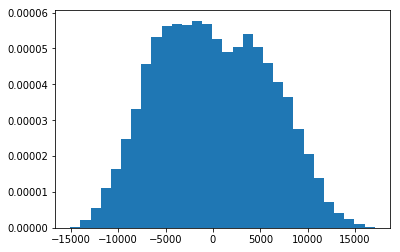

In [42]:
plt.hist(permutacao, density=True, bins=30);

In [43]:
permutacao = np.array(permutacao)

p_direito = len(permutacao[permutacao > Dobs])/len(permutacao)
p_esquerdo = len(permutacao[permutacao < -Dobs])/len(permutacao)

p_total = p_direito + p_esquerdo
p_total

0.77981

**6.** Conclua o teste: uma das versões é estatisticamente melhor que a outra?

**R:** A partir dos dados e a análise do p_total = 77,9%, foi possível concluir que não rejeita o H0 pois a diferença observada (Dobs) ficou fora da região crítica, ou seja a probabilidade que a diferença seja zero é grande.